In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [19]:
df

,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,...,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating,Previous Input,Previous Output,Predicted Efficiency
0,1,2,130,135,11000,23531.70732,0,390.0,34.921707,0.204,...,274,3740,13.540444,1.499655,0.0,6.687037,6.624074,39747.07317,32643.0,1.492290
1,1,3,135,125,12000,19678.04878,0,394.0,32.072049,0.203,...,275,3731,13.579200,1.582186,0.0,6.624074,6.561111,34921.70732,30466.0,1.568860
2,1,4,125,110,12000,16956.09756,0,450.0,29.406098,0.192,...,270,3764,14.244000,1.628020,0.0,6.561111,6.498148,32072.04878,28290.0,1.597257
3,1,5,110,115,13000,17032.92683,0,495.0,30.527927,0.196,...,274,3756,14.192348,1.567538,0.0,6.498148,6.435185,29406.09756,26114.0,1.588009
4,1,6,115,105,15000,16000.00000,0,470.0,31.470000,0.194,...,275,3675,16.165714,1.669190,0.0,6.435185,6.372222,30527.92683,27202.0,1.599535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,9,59,115,130,0,34835.36585,0,635.0,35.470366,0.249,...,362,3366,13.476923,1.601666,8.0,4.141535,4.096561,30009.02439,24710.0,1.503721
436,9,60,130,110,0,31128.04878,0,585.0,31.713049,0.236,...,328,3498,14.241818,1.685318,6.0,4.096561,4.051588,35470.36585,29200.0,1.621148
437,9,61,110,105,0,30079.26829,0,365.0,30.444268,0.212,...,351,3428,14.302857,1.636661,8.0,4.051588,4.006614,31713.04878,26110.0,1.562347
438,9,62,105,145,0,37487.80488,0,710.0,38.197805,0.226,...,368,3210,13.013793,1.574506,8.0,4.006614,3.961641,30444.26829,25030.0,1.659937


In [3]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [4]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [5]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
64/64 - 0s - loss: 0.0088 - mse: 0.0088
Epoch 2/500
64/64 - 0s - loss: 0.0042 - mse: 0.0042
Epoch 3/500


Epoch 136/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 137/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 138/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 139/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 140/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 141/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 142/500
64/64 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 143/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 144/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 145/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 146/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 147/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 148/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 149/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 150/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 151/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 152/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 153/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 154/500
64/64 - 0s - l

Epoch 288/500
64/64 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 289/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 290/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 291/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 292/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 293/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 294/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 295/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 296/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 297/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 298/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 299/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 300/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 301/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 302/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 303/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 304/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 305/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 306/500
64/64 - 0s - l

Epoch 440/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 441/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 442/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 443/500
64/64 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 444/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 445/500
64/64 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 446/500
64/64 - 0s - loss: 8.9995e-04 - mse: 8.9995e-04
Epoch 447/500
64/64 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 448/500
64/64 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 449/500
64/64 - 0s - loss: 8.5990e-04 - mse: 8.5990e-04
Epoch 450/500
64/64 - 0s - loss: 8.8449e-04 - mse: 8.8449e-04
Epoch 451/500
64/64 - 0s - loss: 8.4467e-04 - mse: 8.4467e-04
Epoch 452/500
64/64 - 0s - loss: 9.0573e-04 - mse: 9.0573e-04
Epoch 453/500
64/64 - 0s - loss: 8.3532e-04 - mse: 8.3532e-04
Epoch 454/500
64/64 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 455/500
64/64 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 456/500
64/64 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 457/500
64/64 - 0s - loss: 0

In [6]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.0030871258942815507
Test score is 0.005823702188474036
R2 score is -0.41963430562431037
Train NMSE score is 10.859001615767658
Test NMSE score is 141.96343056243103


In [7]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

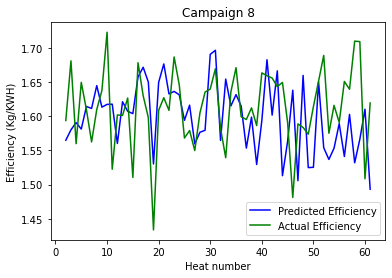

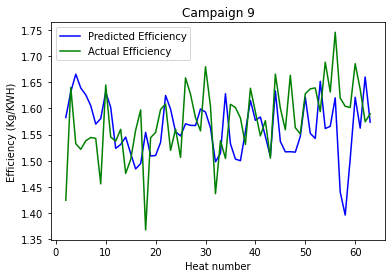

In [8]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [28]:
from scipy.optimize import minimize, LinearConstraint
dfc = df[df['campaign']==9]
dfc = dfc.reset_index(drop=True)
R = np.array(dfc['Refractory lining before heating'])



In [147]:
# Setting initial condition

# R0 = np.ones((dfc.shape[0],1))*2
R0 = R

In [148]:
def objective_function(Coef):
    dfc['Refractory lining before heating'] = Coef
    
    input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
    output_columns = ['Efficiency (MT/KWH)']
    X = dfc[input_columns]
    X_test = X.iloc[:,:].values
    y = dfc[output_columns]
    y_test = y.iloc[:,:].values
    normalized_X_test = scaler1.transform(X_test)
    normalized_y_test = scaler2.transform(y_test)
    pred_test = model.predict(normalized_X_test)
    y_pred_test = scaler2.inverse_transform(pred_test)
    sum_of_squares = np.sum(np.square(y_test-y_pred_test))
    return sum_of_squares

In [149]:
R

array([6.70502646, 6.66005292, 6.61507938, 6.57010584, 6.5251323 ,
       6.48015876, 6.43518522, 6.39021168, 6.34523814, 6.3002646 ,
       6.25529106, 6.21031752, 6.16534398, 6.12037044, 6.0753969 ,
       6.03042336, 5.98544982, 5.94047629, 5.89550275, 5.85052921,
       5.80555567, 5.76058213, 5.71560859, 5.67063505, 5.62566151,
       5.58068797, 5.53571443, 5.49074089, 5.44576735, 5.40079381,
       5.35582027, 5.31084673, 5.26587319, 5.22089965, 5.17592611,
       5.13095257, 5.08597903, 5.04100549, 4.99603195, 4.95105841,
       4.90608487, 4.86111133, 4.81613779, 4.77116425, 4.72619071,
       4.68121717, 4.63624363, 4.59127009, 4.54629656, 4.50132302,
       4.45634948, 4.41137594, 4.3664024 , 4.32142886, 4.27645532,
       4.23148178, 4.18650824, 4.1415347 , 4.09656116, 4.05158762,
       4.00661408, 3.96164054])

In [150]:

def inequality(Coef):
    A = np.zeros((dfc.shape[0],dfc.shape[0]))
#     A[0,0] = 1
    for i in range(dfc.shape[0]-2):
        A[i+1,i] = 1
        A[i+1,i+1] = -1
#     A[i+2,-1] = 1
 
    return np.matmul(A,Coef)-0.001



bounds = [(2, 6.8) for _ in range(dfc.shape[0])]
con1 = {'type':'ineq','fun':inequality}

con = [con1]






In [151]:
res = minimize(objective_function, x0 = R0, constraints=con,bounds=bounds)
res

     fun: 0.41469558217656605
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Positive directional derivative for linesearch'
    nfev: 64
     nit: 5
    njev: 1
  status: 8
 success: False
       x: array([6.70502646, 6.66005292, 6.61507938, 6.57010584, 6.5251323 ,
       6.48015876, 6.43518522, 6.39021168, 6.34523814, 6.3002646 ,
       6.25529106, 6.21031752, 6.16534398, 6.12037044, 6.0753969 ,
       6.03042336, 5.98544982, 5.94047629, 5.89550275, 5.85052921,
       5.80555567, 5.76058213, 5.71560859, 5.67063505, 5.62566151,
       5.58068797, 5.53571443, 5.49074089, 5.44576735, 5.40079381,
       5.35582027, 5.31084673, 5.26587319, 5.22089965, 5.17592611,
       5.13095257, 5.08597903, 5.04100549, 4.99603195, 4.95105841,
       4.9060

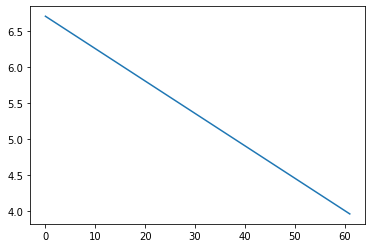

In [152]:
plt.figure()
plt.plot(res.x)

In [ ]:
pred_ef = model.predict()